# Import

### File

In [1]:
import os
import sys
# import csv

### Scientific

In [2]:
import numpy as np
import pandas as pd

### Data Structure

In [3]:
# import collections
from collections import Counter
from collections import defaultdict

### Database

In [4]:
import sqlite3
from sqlite3 import Error

### Functions

In [5]:
from itertools import permutations

### Date and Time

In [6]:
import pytz
from datetime import datetime
from datetime import timedelta

### Machine Learning

In [7]:
# import tensorflow as tf
# from sklearn.preprocessing import QuantileTransformer

### Network

In [8]:
import networkx as nx
# from networkx.algorithms import bipartite

### Plot

In [9]:
# from pylab import *
import matplotlib as mpl
import matplotlib.pyplot as plt

Use `inline` for static and `notebook` for interactive

In [10]:
%matplotlib inline
# %matplotlib notebook

Change default plot configuration

**congif 1** => simple

In [11]:
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

**config 2** => more pretty

In [12]:
mpl.rc('xtick', labelsize=14, color="#222222")  # color="#222222" is dark grey
mpl.rc('ytick', labelsize=14, color="#222222")
mpl.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

Config for **saving** the figure

In [13]:
PROJECT_ROOT_DIR = '.'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def fig_save(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('saving figure ...', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Time Zone

In [14]:
old_timezone = pytz.timezone('UTC')
new_timezone = pytz.timezone('Asia/Seoul')

# Database

In [15]:
PROJECT_ROOT_DIR = '.'

DB_PATH = os.path.join(PROJECT_ROOT_DIR, 'data', 'yonsei.db')
DB_OLD_PATH = os.path.join(PROJECT_ROOT_DIR, 'data', 'yonsei-old.db')

DB_PATHS = [
    os.path.join(PROJECT_ROOT_DIR, 'data', 'LifeMap_GS' + str(x) + '.db')
    for x in range(1, 13)
]

In [16]:
def db_connect(db):
    """
    Connect to a database having its file name
    """
    try:
        conn = sqlite3.connect(db)
        return conn
    except Error as e:
        print(e)
    return None


def db_close(conn):
    """
    Close the connection to a database
    """
    conn.close()


def db_row_count(conn, table_name, print_out=False):
    """
    Calculate the number of entries in a table of a database having its file name
    """
    cur = conn.cursor()
    cur.execute('SELECT COUNT(*) FROM {}'.format(table_name))
    count = cur.fetchall()
    if print_out:
        print('\n|DB|={}'.format(count[0][0]))
    return count[0][0]


def db_create(db, query):
    """
    Create a database based on the input CREATE query
    """
    conn = db_connect(db)
    try:
        cur = conn.cursor()
        cur.execute(query)
    except Error as e:
        print(e)
    conn.close()


def db_insert_many(db, query, data):
    """
    Insert many (more than one) row to a table of a database
    """
    conn = db_connect(db)
    try:
        cur = conn.cursor()
        cur.executemany(query, data)
        conn.commit()
    except Error as e:
        print(e)
    conn.close()

# Functions

In [17]:
def dir_walk(path, ext='', save=False):
    """
    Walk through a directory, find all the file with specified extension
    """
    # set ext to a specific extension if needed
    f = []
    for root, dirs, files in os.walk(path):
        for file in files:
            # relative path of file
            relative_path = os.path.join(root, file)
            # extention (type of file)
            ext_of_file = os.path.splitext(relative_path)[-1].lower()[1:]
            # if extension is set and equal to what we want
            if ext != '' and ext_of_file == ext:
                f.append(os.path.abspath(relative_path))
            # if extension is not set add the file anyway
            else:
                f.append(os.path.abspath(relative_path))
    f.sort()
    if save: np.savetxt('files.csv', f, delimiter=',', fmt='%s')
    return f


def colors_create(number_of_colors=1, color_map='Wistia', output=False):
    """
    create a series of colors from the selected spectrum, e.g., Wistia (cold to hot)
    """
    color_list = []
    cmap = cm.get_cmap(color_map, number_of_colors)
    for i in range(cmap.N):
        rgb = cmap(
            i)[:3]  # will return rgba, we take only first 3 so we get rgb
        # print(matplotlib.colors.rgb2hex(rgb))
        color_list.append(matplotlib.colors.rgb2hex(rgb))
    if output:
        for i in range(len(color_list)):
            plt.scatter(i, 1, c=color_list[i], s=20)
    return color_list


def dict_add(dictionary, key, value):
    """
    Add a key:value to dictionary if key does not already exist
    """
    if key not in dictionary:
        dictionary[key] = value


def dict_lookup(dictionary, key):
    """
    Search the given KEY in dictionary ...
    found -> return its value (could be an index assign to that value)
    not found -> add the key and return its value (which is a new index)
    useful for creating hash table of KEY->INDEX
    """
    value = 0
    if key not in dictionary:
        value = len(dictionary)
        dictionary[key] = value
    else:
        value = dictionary.get(key)
    return value

# Data Processing - Old DB

Working with single database of one user only    
`LifeMap_GS1.db`

In [18]:
conn = db_connect(DB_PATHS[10])

query = f"""
SELECT *
FROM apTable
ORDER BY _time_ap
LIMIT 100
"""

df = pd.read_sql_query(query, conn)

db_close(conn)

In [19]:
df.head()

,_ap_id,_node_id,_bssid,_ssid,_open,_signal,_signal_deviation,_sample_count,_time_ap
0,1,1,00:og:1f:2e:4n:6c,NEMO,[WPA-PSK-TKIP],-62.00,4.636809,4,20111028165919FRI
1,2,1,00:og:1f:2e:l2:a4,MCL,[WPA-PSK-TKIP],-69.25,4.493050,4,20111028165919FRI
2,3,1,00:bl:66:14:ye:48,toc,[WPA-PSK-CCMP][WPA2-PSK-CCMP],-77.50,4.924429,4,20111028165919FRI
3,4,1,00:9f:a6:90:zf:50,Imsurki,[WPA2-PSK-CCMP],-78.25,1.785357,4,20111028165919FRI
4,5,1,00:ly:10:12:1n:5f,linksys,[WPA-PSK-CCMP],-77.25,5.214163,4,20111028165919FRI


Working with main **"old"** databse containing info of all users interactions    
`yonsei-old.db`

In [28]:
conn = db_connect(DB_OLD_PATH)

query = f"""
SELECT i,j,t
FROM edgelist
ORDER BY t
"""

df = pd.read_sql_query(query, conn)
print('#', len(df))
db_close(conn)

# 3882


In [29]:
df.head()

,i,j,t
0,3,12,12900150
1,3,12,12900402
2,3,12,12900942
3,3,12,12904398
4,3,12,12906126


Change type of column `t` to `int` from `str`

In [32]:
df.t = df.t.astype(int) * 100

In [33]:
df.head()

,i,j,t
0,3,12,1290015000
1,3,12,1290040200
2,3,12,1290094200
3,3,12,1290439800
4,3,12,1290612600


Working with the time info:
* Changing time zone

In [34]:
datetime_column = []
# date_column = []
# hour_column = []

for ts in df.t:
    # time_temp = datetime.utcfromtimestamp(int(ts)*100)
    # time_temp = old_timezone.localize(time_temp).astimezone(new_timezone)
    time_temp = datetime.fromtimestamp(ts)
    time_temp = new_timezone.localize(time_temp)
    datetime_column.append(time_temp)
    # date_column.append(time_temp.date())
    # hour_column.append(time_temp.hour)

df['datetime'] = datetime_column
# df['date'] = date_column
# df['hour'] = hour_column

In [35]:
df.head()

,i,j,t,datetime
0,3,12,1290015000,2010-11-17 14:00:00+09:00
1,3,12,1290040200,2010-11-17 21:00:00+09:00
2,3,12,1290094200,2010-11-18 12:00:00+09:00
3,3,12,1290439800,2010-11-22 12:00:00+09:00
4,3,12,1290612600,2010-11-24 12:00:00+09:00


In [37]:
len(df.datetime.unique())

1295

Size of timestamp set `|T| = 1295` with the following frequency:

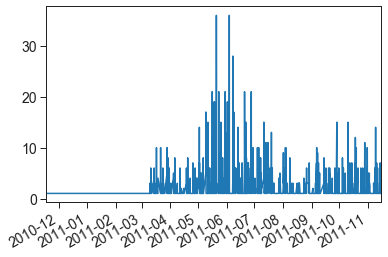

In [46]:
# df.datetime.value_counts()
df.datetime.value_counts().plot()

In [47]:
timestamps = sorted(df.t.unique())

Create `{timestamp:edgelist}` dictionary

In [48]:
# initialize dictionary with timestamps
time_edges = {}
for t in timestamps:
    time_edges[t] = []

# update dictionary with the edges belong to each timestamp
for row in df.itertuples(index=True, name='Pandas'):
    time_edges[getattr(row, 't')].append((getattr(row, 'i'), getattr(row,
                                                                     'j')))

# (Aggregated) Temporal Network

In [79]:
def temporal_create(output=False, save=False):
    """
    Read (v,u,time) interactions from database
    then create a Multi-Link Directed Graph
    """
    # empty graph
    graph = nx.MultiDiGraph()

    # read from DB
    conn = db_connect(DB_OLD_PATH)
    query = f"""
    SELECT i,j,t
    FROM edgelist
    ORDER BY t
    """
    df = pd.read_sql_query(query, conn)
    db_close(conn)

    if output: print('number of records = {}'.format(len(df)))

    # change the type of timestamp to int (from str)
    df.t = df.t.astype(int) * 100

    # convert timestamp to datetime as a new column
    datetime_column = []
    for ts in df.t:
        time_temp = datetime.fromtimestamp(ts)
        time_temp = new_timezone.localize(time_temp)
        datetime_column.append(time_temp)
    df['datetime'] = datetime_column

    # create timestamp list
    timestamps = sorted(df.t.unique())
    if output: print('number of timestamps = {}'.format(len(timestamps)))

    # create {timestamp:edgelist} dictionary
    time_edges = {}
    for t in timestamps:
        time_edges[t] = []

    # update time_edges
    for row in df.itertuples(index=True, name='Pandas'):
        time_edges[getattr(row, 't')].append((getattr(row,
                                                      'i'), getattr(row, 'j')))
        # each interaction is bi-directional
        time_edges[getattr(row, 't')].append((getattr(row,
                                                      'j'), getattr(row, 'i')))

    # update network
    # add list of edges [(a,b),(c,d), ...] with associated timestamp
    for k, v in time_edges.items():
        graph.add_edges_from(v, timestamp=k)

    # save graph
    if save:
        nx.write_gpickle(graph, 'data/temporal.gpickle')
        pd.DataFrame(sorted(list(timestamps))).to_csv('data/times.csv',
                                                      header=None,
                                                      index=False)

        # nx.write_edgelist(graph, 'data/temporal-edgelist.txt', data=True)
        # pd.DataFrame(sorted(list(graph.nodes))).to_csv('data/nodes.csv', header=None, index=False)

    return graph, pd.Series(timestamps)

In [80]:
# temporal, times = temporal_create()

In [57]:
def temporal_read(output=True):
    graph = nx.read_gpickle('data/temporal.gpickle')
    # agg_tem = nx.read_edgelist('data/graph/yonsei-agg-tem-edgelist.txt',nodetype=int,create_using=nx.MultiDiGraph())
    # nodes = pd.read_csv('data/var/yonsei-agg-tem-nodes.csv',index_col=False,header=None,names=['node']).iloc[:,0]
    times = pd.read_csv('data/times.csv',
                        index_col=False,
                        header=None,
                        names=['times']).iloc[:, 0]

    if output:
        print('Temporal Netwrok')
        print('|N| =', graph.number_of_nodes())
        print('|L| =', graph.number_of_edges())
        print('|T| =', len(times))

    return graph, times

In [73]:
temporal, times = temporal_read()

Temporal Netwrok
|N| = 12
|L| = 7764
|T| = 1295


In [72]:
list(temporal.edges(data=True))[:5]

[(3, 12, {'timestamp': 1290015000}),
 (3, 12, {'timestamp': 1290040200}),
 (3, 12, {'timestamp': 1290094200}),
 (3, 12, {'timestamp': 1290439800}),
 (3, 12, {'timestamp': 1290612600})]

# (Aggregated) Static Network

In [83]:
def static_create(temporal, output=False, save=False):
    # empty graph
    graph = nx.Graph()

    # read temporal, count the multi-edges between nodes
    # turn the count to "frequency" weight for links
    for u, v, data in temporal.edges(data=True):
        t = 1 if 'timestamp' in data else 0
        if graph.has_edge(u, v):
            graph[u][v]['weight'] += t
        else:
            graph.add_edge(u, v, weight=t)

    # devide weight by 2 because it was counted twice
    for u, v, data in graph.edges(data=True):
        graph[u][v]['weight'] //= 2

    # save graph
    if save:
        nx.write_gpickle(graph, 'data/static.gpickle')
        # nx.write_edgelist(graph, 'data/static-edgelist.txt', data=True)

    return graph

In [85]:
# static = static_create(temporal)

In [90]:
def static_read(output=True):
    graph = nx.read_gpickle('data/static.gpickle')

    if output:
        print('Static Netwrok')
        print('|N| =', graph.number_of_nodes())
        print('|L| =', graph.number_of_edges())

    return graph

In [91]:
static = static_read()

Static Netwrok
|N| = 12
|L| = 55


In [92]:
print('diameter:', nx.algorithms.distance_measures.diameter(static))
print('is connected:', nx.algorithms.components.is_connected(static))
print('cc:', nx.algorithms.components.number_connected_components(static))
print('density:', nx.classes.function.density(static))
# print('# density:',nx.algorithms.components.connected_components(static))
# list(static.edges(data=True))

diameter: 2
is connected: True
cc: 1
density: 0.8333333333333334


# Directed time-series temporal network

Create delta time from one edge to another one

In [0]:
## epoch -> datatime format of timestamps
t = [datetime.fromtimestamp(ts) for ts in timestamps]

## calculate the time difference from t_1 to t_end
t1 = pd.Series(t[1:])
t2 = pd.Series(t[:len(t) - 1])
t3 = t1 - t2

## convert time difference back to second and then "hour" format
delta = [int(ts.total_seconds() // 3600) for ts in t3]

## add a "0" to the begginig so we get len(timestamp) = len(delta)
## this is mainly because we don't have anything before the first timestamp
## so we don't have a time difference for it, and we assume it is "1" hour by default
delta.insert(0, 1)  # (postion, value)

## count the values in the delta
delta_count = pd.Series(Counter(delta)).sort_index()
# print(delta_count[:24])

## save delta time
# pd.DataFrame(delta).to_csv('data/agg-temporal-delta.csv',header=None,index=False)

delta = pd.Series(delta)
# delta

Create nodes' colors

In [0]:
from pylab import *

cmap = cm.get_cmap('Wistia', len(timestamps) + 1)

color_list = []
for i in range(cmap.N):
    rgb = cmap(i)[:3]  # will return rgba, we take only first 3 so we get rgb
    #     print(matplotlib.colors.rgb2hex(rgb))
    color_list.append(matplotlib.colors.rgb2hex(rgb))

<IPython.core.display.Javascript object>


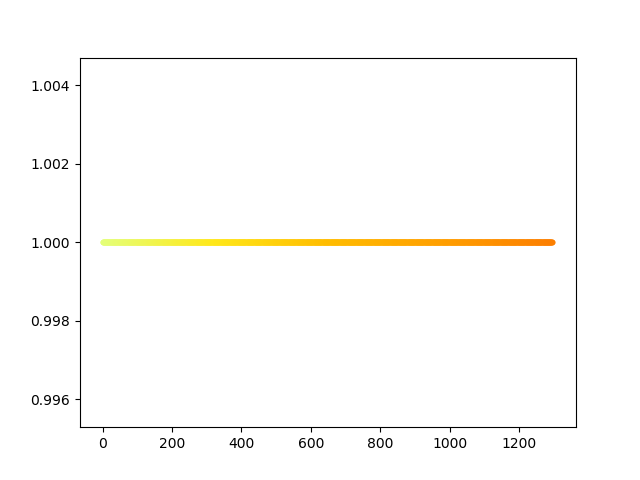

In [0]:
for i in range(len(color_list)):
    plt.scatter(i, 1, c=color_list[i], s=10)

Create the graph

In [0]:
from pylab import *


def directed_temporal(save=False):
    ## empty graph
    graph = nx.DiGraph()

    ## read original nodes of aggregated temporal network
    node_list = pd.Series(sorted(list(agg_tem.nodes)))

    ## calculate colors of new nodes for directed temporal network
    color_list = []
    cmap = cm.get_cmap('Wistia', len(timestamps) + 1)
    for i in range(cmap.N):
        rgb = cmap(i)[:3]
        color_list.append(matplotlib.colors.rgb2hex(rgb))

    ## create new set of nodes for di-temp
    ## and connect them using the following auxiliary lists
    ## prev and after node list and typle for edges between them
    edge_tuple_list = []
    nodes_prev = []
    nodes_curr = []

    for t in range(len(timestamps) + 1):
        nodes_curr.clear()
        for n in range(len(node_list)):
            node_id = n + t * len(node_list)
            nodes_curr.append(node_id)

            ## add nodes
            graph.add_node(node_id,
                           parent=node_list[n],
                           color=color_list[t],
                           pos=(t, node_list[n]))

        if nodes_prev:
            edge_tuple_list.clear()
            for i in range(len(nodes_prev)):
                edge_tuple_list.append((nodes_prev[i], nodes_curr[i]))

            ## add edges
            graph.add_edges_from(
                edge_tuple_list,
                timestamp=timestamps.loc[t - 1],
                ## we have the time index so we just use it for getting delta
                deltatime=delta.loc[t - 1],
                color='silver')

        nodes_prev = nodes_curr[:]

    ## add edges from agg-tem to di-tem network
    for u, v, weight in agg_tem.edges(data='timestamp'):
        if weight is not None:
            u_index = node_list[node_list == u].index[0]
            v_index = node_list[node_list == v].index[0]
            t_index = timestamps[timestamps == weight].index[0]
            graph.add_edge(
                u_index + t_index * (len(node_list)),
                v_index + (t_index + 1) * (len(node_list)),
                timestamp=weight,
                # deltatime=delta.loc[t_index],
                deltatime=delta.loc[timestamps[timestamps == weight].index[0]],
                weight=1,
                color='black')

    ## add weight to horizontal edges based on method (i or ii) and alpha value

    ## save network
    if save:
        nx.write_gpickle(graph, 'data/graph/yonsei-di-tem.gpickle')
        nx.write_edgelist(graph,
                          'data/graph/yonsei-di-temp-edgelist.txt',
                          data=True)

    return graph

In [0]:
# di_tem = directed_temporal()

In [0]:
# agg_tem = nx.read_edgelist('data/graph/yonsei-di-tem-edgelist.txt',nodetype=int,create_using=nx.MultiDiGraph())
di_tem = nx.read_gpickle('data/graph/yonsei-di-tem.gpickle')

In [0]:
print('# nodes:', len(di_tem))
print('# edges:', len(di_tem.edges))
# list(di_tem.edges(data=True))

# nodes: 15552
# edges: 23304


total edge of agg-tem = 3,882 from 12 nodes, and total edge of di-tem = 19,422 - total line edges (org_node*timestamp) = 12 x 1295 or 15,540 = 3,882 which is same number of agg_tem edges.

Add weights for edges useful in calculating HITS where we want to panalize the horizonal edges that ...
the source node does not have any other outdegree edges to other nodes except itself in future, meaning ...
any node with indegree of less that 2 (either 1 or 0 which is only for the nodes at time zero) must get panalized

In [0]:
alpha = 0.5
weight = 1

T = len(timestamps)  # size of timestamps list
N = len(nodes)  # size of original nodes

## produce list of a node fron [1...249] and its successors [1,249,498,...]
node_chain = {}
for n in range(N):
    node_chain[n] = [(N * t) + n for t in range(T + 1)]

for k, v in node_chain.items():
    for i in range(len(v)):
        if di_tem.in_degree(v[i]) == 0:
            ## case of dealing with the first node at time = 0
            ## there is no edge pointing to this node so we skip it
            continue
        elif di_tem.in_degree(v[i]) > 1:
            ## the node is not end point of a horizontal line
            ## so weight = 1 or pre-defined default
            di_tem[v[i - 1]][v[i]]['weight'] = weight
        else:
            ## case when indegree = 1 i.e. current node is the end of a horizontal edge
            ## its weight is multiplication of previous edge e.g. if previous is horizontal then:
            ## weight = prev (1/2) * current (1/2) ...
            if i == 1:
                di_tem[v[i - 1]][v[i]]['weight'] = alpha
            else:
                ## (1/2)^(lengh of horizontal path)
                # di_tem[v[i-1]][v[i]]['weight'] = alpha * di_tem[v[i-2]][v[i-1]]['weight']
                ## (1/lenght of horizontal path)
                di_tem[v[i - 1]][v[i]]['weight'] = 1 / (
                    (1 / di_tem[v[i - 2]][v[i - 1]]['weight']) + 1)

In [0]:
list(di_tem.edges(data=True))

[(0, 12, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (1, 13, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (2, 14, {'timestamp': 1290015000, 'color': 'silver', 'weight': 1}),
 (2, 23, {'timestamp': 1290015000, 'deltatime': 1, 'color': 'black'}),
 (3, 15, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (4, 16, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (5, 17, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (6, 18, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (7, 19, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (8, 20, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (9, 21, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (10, 22, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (11, 23, {'timestamp': 1290015000, 'color': 'silver', 'weight': 1}),
 (11, 14, {'timestamp': 1290015000, 'deltatime': 1, 'color': 'black'}),
 (12, 2

In [0]:
l0 = node_chain[1]
# w0 = [(l0[i],di_tem[i-1][i]['weight']) for i in range(1,len(l0))]
for i in range(1, len(l0)):
    print('w({},{})={}'.format(l0[i - 1], l0[i],
                               di_tem[l0[i - 1]][l0[i]]['weight']))

w(1,13)=0.5
w(13,25)=0.3333333333333333
w(25,37)=0.25
w(37,49)=0.2
w(49,61)=0.16666666666666666
w(61,73)=0.14285714285714285
w(73,85)=0.125
w(85,97)=0.1111111111111111
w(97,109)=0.1
w(109,121)=0.09090909090909091
w(121,133)=0.08333333333333333
w(133,145)=0.07692307692307693
w(145,157)=0.07142857142857142
w(157,169)=0.06666666666666667
w(169,181)=0.0625
w(181,193)=0.058823529411764705
w(193,205)=0.05555555555555555
w(205,217)=0.05263157894736842
w(217,229)=0.05
w(229,241)=0.047619047619047616
w(241,253)=0.045454545454545456
w(253,265)=0.043478260869565216
w(265,277)=0.041666666666666664
w(277,289)=0.04
w(289,301)=0.038461538461538464
w(301,313)=0.037037037037037035
w(313,325)=0.03571428571428571
w(325,337)=0.034482758620689655
w(337,349)=0.03333333333333333
w(349,361)=0.03225806451612903
w(361,373)=0.03125
w(373,385)=0.030303030303030304
w(385,397)=0.029411764705882353
w(397,409)=0.02857142857142857
w(409,421)=0.027777777777777776
w(421,433)=0.02702702702702703
w(433,445)=0.026315789473

# Data Processing - New DB

Working with main **"new"** (improved) databse containing info of all users interactions    
`yonsei.db`

In [95]:
conn = db_connect(DB_PATH)

query = f"""
SELECT user,ssid,bssid,location,time
FROM logs
ORDER BY time
"""

df = pd.read_sql_query(query, conn)
print('#', len(df))
db_close(conn)

# 585152


In [96]:
df.head()

,user,ssid,bssid,location,time
0,12,74,177,2833,20101114182612SUN
1,12,4241,13710,2833,20101114182636SUN
2,12,361,930,2833,20101114182636SUN
3,12,11,13711,2833,20101114182636SUN
4,12,4242,13712,2833,20101114182636SUN


Change type of column `time` to `epoch` (int)

In [82]:
# df.time = [datetime.strptime(x[:-3], '%Y%m%d%H%M%S') for x in df.time]

In case of reseting munite and second of timestamps to 0 we can use `replace` methods on `datetime` objects

In [97]:
df.time = [
    datetime.strptime(x[:-3], '%Y%m%d%H%M%S').replace(minute=0, second=0)
    for x in df.time
]

It turned out, if we don't convert/reset the timestamp at this stage, we are going to end up with **356** user-user interactions at the time grangularity of second    
However, if we DO modify timestamps now i.e. reudcing grangularity to hour, we end up with **132,394** interactions    
**Note**: Among these interaction, there can exist some redundant interaction between two users at one timestamp through various ssid/bssid/location   
Therefore, It is good practive to (1) either aggregate these redundent interaction and give a weigth to coressponding edge (2) leave them as they are, until creating the temporal network and then only consier one of them

In [98]:
df.head()

,user,ssid,bssid,location,time
0,12,74,177,2833,2010-11-14 18:00:00
1,12,4241,13710,2833,2010-11-14 18:00:00
2,12,361,930,2833,2010-11-14 18:00:00
3,12,11,13711,2833,2010-11-14 18:00:00
4,12,4242,13712,2833,2010-11-14 18:00:00


Group the rows of dataframe based on **time** and then **ssid/bssid**

In [99]:
# grouped = df.groupby(df['time'])['user'].count()
# grouped = df['user'].groupby(df['time']).count()
# grouped = df.groupby('time').count()
grouped = df.groupby('time').size()
grouped

time
2010-11-14 18:00:00    46
2010-11-14 19:00:00    30
2010-11-15 07:00:00    25
2010-11-15 08:00:00    41
2010-11-15 10:00:00    10
                       ..
2011-11-16 10:00:00    36
2011-11-16 11:00:00    61
2011-11-16 12:00:00    35
2011-11-16 13:00:00     1
2011-11-16 14:00:00    11
Length: 6320, dtype: int64

The total of **119,251** unique timestamp exist (without timestamp modification) and **6,320** with time windows of one hour

In [72]:
# for value, group in grouped:
#     print(value)
#     print(group)

Question is "How many of them have more than **1** user interaction ..."

In [100]:
column_source = []
column_destination = []
column_time = []
column_ssid = []

for time_value, time_group in df.groupby('time'):
    filtered_users = time_group.user.unique()
    if len(filtered_users) > 1:
        # print(time_value)
        # print(time_group)
        for ssid_value, ssid_group in time_group.groupby('ssid'):
            selected_users = ssid_group.user.unique()
            if len(selected_users) > 1:
                # print(ssid_value)
                # print(ssid_group)
                # print('---')
                # print("time= {}\nall users= {}\nselected users= {}\n".format(time_value, filtered_users, selected_users))
                edge_list = list(permutations(selected_users, 2))
                for edge in edge_list:
                    column_source.append(edge[0])
                    column_destination.append(edge[1])
                    column_time.append(time_value)
                    column_ssid.append(ssid_value)
df_out = pd.DataFrame({
    'u': column_source,
    'v': column_destination,
    't': column_time,
    'ssid': column_ssid
})
df_out.to_csv('data/edgelist-ssid-full.csv', header=False, index=False)

In [102]:
len(df_out.t.unique())

3540

Only **3,540** timestamps out of **6,320** have user-user interactions

In [103]:
df_out.head()

,u,v,t,ssid
0,12,3,2010-11-17 14:00:00,677
1,3,12,2010-11-17 14:00:00,677
2,12,3,2010-11-17 14:00:00,679
3,3,12,2010-11-17 14:00:00,679
4,12,3,2010-11-17 14:00:00,4268


Dealing with redundant nodes, there is a small modification in code ...    
In each timestamp, we count how many times each edge apears

In [112]:
# for uvt_value, uvt_group in df_out.groupby(['u','v','t']):
#     print(uvt_value)
#     print(uvt_group)

In [113]:
df_out = df_out.groupby(['u', 'v', 't']).size().reset_index(name='w')
df_out.to_csv('data/edgelist-ssid.csv', header=False, index=False)

In [129]:
df_out.head()

,u,v,t,w
0,1,2,2011-05-02 09:00:00,4
1,1,2,2011-05-02 11:00:00,2
2,1,2,2011-05-02 12:00:00,3
3,1,2,2011-05-02 19:00:00,5
4,1,2,2011-05-02 20:00:00,2


In [115]:
len(df_out)

28130

After aggregating duplicated edges we are down to **28,130** interactions from **132,394**

In [116]:
len(df_out.t.unique())

3540

Size of timestamp set or **|T| = 3,540** while in old_db calculation used to be **1,295**

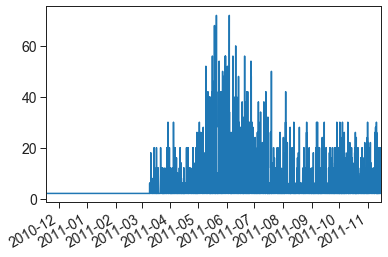

In [117]:
# df.datetime.value_counts()
df_out.t.value_counts().plot()

It seems that before $\approx$ 2011-03 there is not many data point (i.e. interactions frequency is slightly above 0 or equal to 1)    
Therefore, It sounds logical to consider that part noise, and take out of the dataset

In [121]:
sorted(df_out.t.value_counts().items(), key=lambda x: x[0])
# sorted(df_out.t.value_counts().items(), key=lambda x: x[1])
# sorted(df_out[df_out.t >= '2011-03'].t.value_counts().items(), key=lambda x: x[0])

[(Timestamp('2010-11-17 14:00:00'), 2),
 (Timestamp('2010-11-17 21:00:00'), 2),
 (Timestamp('2010-11-17 22:00:00'), 2),
 (Timestamp('2010-11-18 10:00:00'), 2),
 (Timestamp('2010-11-18 12:00:00'), 2),
 (Timestamp('2010-11-18 17:00:00'), 2),
 (Timestamp('2010-11-18 18:00:00'), 2),
 (Timestamp('2010-11-19 14:00:00'), 2),
 (Timestamp('2010-11-20 12:00:00'), 2),
 (Timestamp('2010-11-20 17:00:00'), 2),
 (Timestamp('2010-11-20 18:00:00'), 2),
 (Timestamp('2010-11-22 12:00:00'), 2),
 (Timestamp('2010-11-24 11:00:00'), 2),
 (Timestamp('2010-11-24 12:00:00'), 2),
 (Timestamp('2010-11-24 16:00:00'), 2),
 (Timestamp('2010-11-24 18:00:00'), 2),
 (Timestamp('2010-11-24 19:00:00'), 2),
 (Timestamp('2010-11-25 13:00:00'), 2),
 (Timestamp('2010-11-25 18:00:00'), 2),
 (Timestamp('2010-11-25 19:00:00'), 2),
 (Timestamp('2010-11-26 13:00:00'), 2),
 (Timestamp('2010-11-26 21:00:00'), 2),
 (Timestamp('2010-11-27 09:00:00'), 2),
 (Timestamp('2010-11-29 07:00:00'), 2),
 (Timestamp('2010-11-29 08:00:00'), 2),


In [124]:
df_out = df_out[df_out.t >= '2011-03']
df_out.to_csv('data/edgelist-ssid.csv', header=False, index=False)

In [125]:
len(df_out)

27722

After removing timestamp < 2011-03 we are down to **27,722** interactions from **28,130**

In [126]:
len(df_out.t.unique())

3336

Size of timestamp set or **|T| = 3,336** from **3,540** compared to before

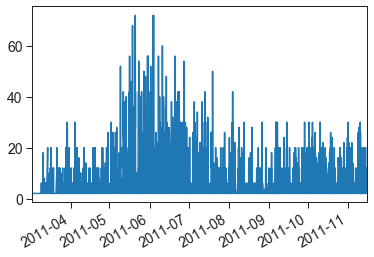

In [127]:
# df.datetime.value_counts()
df_out.t.value_counts().plot()

Now with a more clean dataset, we can see that usually the interaction are in range 2 ... 20    
Except, from 2011-05 until 2011-07 we have reletavely high interaction in rage 20 ... 60

With having dataset of interactions ready, next we move to creating the temporal network :)

# (Aggregated) Temporal Network

In [18]:
def temporal_create(output=False, save=False):
    """
    Read (v,u,t) interactions from dataset file e.g. edgelist.csv
    Create a Multi-Link Directed Graph as (Aggregated) Temporal Network
    """
    # empty graph
    graph = nx.MultiDiGraph()

    # read from file
    data = pd.read_csv('data/edgelist-ssid.csv',
                       index_col=False,
                       header=None,
                       names=['u', 'v', 't', 'w'],
                       parse_dates=['t'])
    if output: print('# records = {}'.format(len(data)))

    # create times list
    times = sorted(data.t.unique())
    if output: print('# timestamps = {}'.format(len(times)))

    # iter into edge list
    # add nodes nad adges of network
    for row in data.itertuples(index=False):
        graph.add_edge(row.u, row.v, t=row.t, w=row.w)

    if save:
        nx.write_gpickle(graph, 'data/temporal.gpickle')
        # nx.write_edgelist(graph,'data/temporal-edgelist.txt',data=True)

        np.savetxt('data/times.csv', times, delimiter=',', fmt='%s')
        # pd.DataFrame(sorted(list(times))).to_csv('data/times.csv',header=None,index=False)

    return graph, pd.Series(times)

In [19]:
# T, times = temporal_create(output=True, save=True)
# T, times = temporal_create()

In [20]:
def temporal_read(output=True):
    graph = nx.read_gpickle('data/temporal.gpickle')
    times = pd.read_csv('data/times.csv',
                        index_col=False,
                        header=None,
                        names=['times']).iloc[:, 0].astype('datetime64[ns]')
    if output:
        print('Temporal Netwrok')
        print('|N| =', graph.number_of_nodes())
        print('|L| =', graph.number_of_edges())
        print('|T| =', len(times))

    return graph, times

In [21]:
T, times = temporal_read()

Temporal Netwrok
|N| = 12
|L| = 27722
|T| = 3336


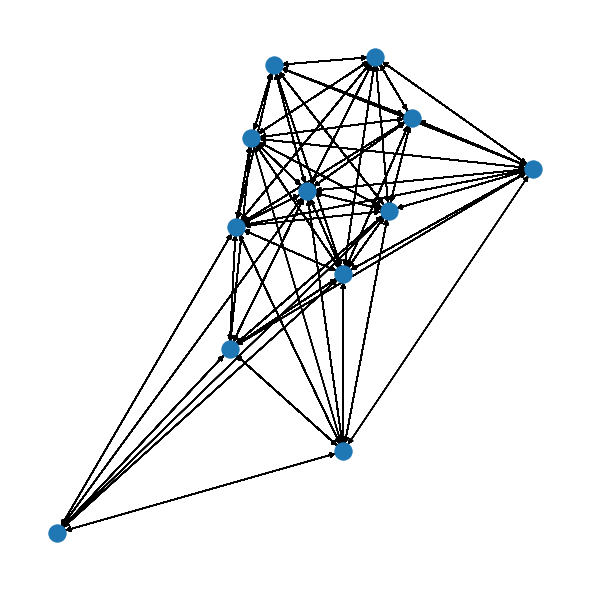

In [165]:
fig = plt.figure(figsize=(8,8))
# nx.draw_spring(T, node_size=40)
nx.draw_spring(T)

In [22]:
list(T.edges(data=True))[:5]

[(1, 2, {'t': Timestamp('2011-05-02 09:00:00'), 'w': 4}),
 (1, 2, {'t': Timestamp('2011-05-02 11:00:00'), 'w': 2}),
 (1, 2, {'t': Timestamp('2011-05-02 12:00:00'), 'w': 3}),
 (1, 2, {'t': Timestamp('2011-05-02 19:00:00'), 'w': 5}),
 (1, 2, {'t': Timestamp('2011-05-02 20:00:00'), 'w': 2})]

In [26]:
from dateutil.parser import parse

In [32]:
times[times==parse('2011-05-02 20:00:00')].index[0]

581

In [221]:
haha = np.zeros((12,12))
haha

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [224]:
# haha[0:4,0:4] = np.identity((4))
haha[5:9,5:9] = np.identity((4))

In [225]:
haha

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [239]:
N = 4
T = 3
S = np.zeros((N * T, N * T))
for t in range(T - 1):
    # main-diagonal : 1
    # S[N * t:N * (t + 1), N * t:N * (t + 1)] = np.identity((N))
    # main-diagonal shift-right : 1
    # S[N * t:N * (t + 1), N * (t + 1):N * (t + 2)] = np.identity((N))
    # main-diagonal shift-left : 1
    S[N * (t + 1):N * (t + 2), N * t:N * (t + 1)] = np.identity((N))*.5
    print('{}:{}\t{}:{}'.format(N * (t + 1), N * (t + 2), N * t, N * (t + 1)))

4:8	0:4
8:12	4:8


In [237]:
S.shape

(12, 12)

In [240]:
S

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ]])

# Supra-Matrix

In [ ]:
def supra_create(graph,
                 times,
                 version=0,
                 temporal_edge_weight=1,
                 normal_edge_weight=1,
                 output=False,
                 save=False):
    """
    Create supra-matrix from tempral network
    v-0: Simple form of 2016 paper with undirected inter-layer temporal links
    """

    # variables
    N = graph.number_of_nodes()
    L = graph.number_of_edges()
    T = len(times)

    # we have timestamps map via "times" which is a series index -> timestamp
    # we also need such a map for nodes i.e. index -> node_id/name
    nodes = pd.Series(sorted(list(graph.nodes())))

    S = np.zeros((N * T, N * T))  # supra

    # add horizontal (i.e. inter-layer) edges
    # v-0
    if version == 0:
        for t in range(T - 1):
            S[N * t:N * (t + 1), N * (t + 1):N * (t + 2)] = np.identity(
                (N)) * temporal_edge_weight
            S[N * (t + 1):N * (t + 2), N * t:N * (t + 1)] = np.identity(
                (N)) * temporal_edge_weight

    # add crossed (i.e. intra-layer) edges
    for u, v, w in G.edges(data=True):
        t_index = times[times == w['t']].index[0]
        u_index = nodes[nodes == u].index[0]
        v_index = nodes[nodes == v].index[0]
        S[u_index * t_index, v_index * t_index] = 1 * normal_edge_weight

    return graph, times

# (Aggregated) Static Network

In [83]:
def static_create(temporal, output=False, save=False):
    # empty graph
    graph = nx.Graph()

    # read temporal, count the multi-edges between nodes
    # turn the count to "frequency" weight for links
    for u, v, data in temporal.edges(data=True):
        t = 1 if 'timestamp' in data else 0
        if graph.has_edge(u, v):
            graph[u][v]['weight'] += t
        else:
            graph.add_edge(u, v, weight=t)

    # devide weight by 2 because it was counted twice
    for u, v, data in graph.edges(data=True):
        graph[u][v]['weight'] //= 2

    # save graph
    if save:
        nx.write_gpickle(graph, 'data/static.gpickle')
        # nx.write_edgelist(graph, 'data/static-edgelist.txt', data=True)

    return graph

In [85]:
# static = static_create(temporal)

In [90]:
def static_read(output=True):
    graph = nx.read_gpickle('data/static.gpickle')

    if output:
        print('Static Netwrok')
        print('|N| =', graph.number_of_nodes())
        print('|L| =', graph.number_of_edges())

    return graph

In [91]:
static = static_read()

Static Netwrok
|N| = 12
|L| = 55


In [92]:
print('diameter:', nx.algorithms.distance_measures.diameter(static))
print('is connected:', nx.algorithms.components.is_connected(static))
print('cc:', nx.algorithms.components.number_connected_components(static))
print('density:', nx.classes.function.density(static))
# print('# density:',nx.algorithms.components.connected_components(static))
# list(static.edges(data=True))

diameter: 2
is connected: True
cc: 1
density: 0.8333333333333334


# Directed time-series temporal network

Create delta time from one edge to another one

In [0]:
## epoch -> datatime format of timestamps
t = [datetime.fromtimestamp(ts) for ts in timestamps]

## calculate the time difference from t_1 to t_end
t1 = pd.Series(t[1:])
t2 = pd.Series(t[:len(t) - 1])
t3 = t1 - t2

## convert time difference back to second and then "hour" format
delta = [int(ts.total_seconds() // 3600) for ts in t3]

## add a "0" to the begginig so we get len(timestamp) = len(delta)
## this is mainly because we don't have anything before the first timestamp
## so we don't have a time difference for it, and we assume it is "1" hour by default
delta.insert(0, 1)  # (postion, value)

## count the values in the delta
delta_count = pd.Series(Counter(delta)).sort_index()
# print(delta_count[:24])

## save delta time
# pd.DataFrame(delta).to_csv('data/agg-temporal-delta.csv',header=None,index=False)

delta = pd.Series(delta)
# delta

Create nodes' colors

In [0]:
from pylab import *

cmap = cm.get_cmap('Wistia', len(timestamps) + 1)

color_list = []
for i in range(cmap.N):
    rgb = cmap(i)[:3]  # will return rgba, we take only first 3 so we get rgb
    #     print(matplotlib.colors.rgb2hex(rgb))
    color_list.append(matplotlib.colors.rgb2hex(rgb))

<IPython.core.display.Javascript object>


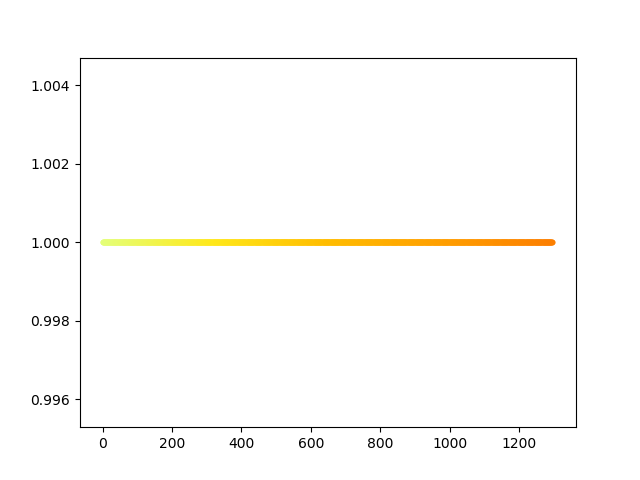

In [0]:
for i in range(len(color_list)):
    plt.scatter(i, 1, c=color_list[i], s=10)

Create the graph

In [0]:
from pylab import *


def directed_temporal(save=False):
    ## empty graph
    graph = nx.DiGraph()

    ## read original nodes of aggregated temporal network
    node_list = pd.Series(sorted(list(agg_tem.nodes)))

    ## calculate colors of new nodes for directed temporal network
    color_list = []
    cmap = cm.get_cmap('Wistia', len(timestamps) + 1)
    for i in range(cmap.N):
        rgb = cmap(i)[:3]
        color_list.append(matplotlib.colors.rgb2hex(rgb))

    ## create new set of nodes for di-temp
    ## and connect them using the following auxiliary lists
    ## prev and after node list and typle for edges between them
    edge_tuple_list = []
    nodes_prev = []
    nodes_curr = []

    for t in range(len(timestamps) + 1):
        nodes_curr.clear()
        for n in range(len(node_list)):
            node_id = n + t * len(node_list)
            nodes_curr.append(node_id)

            ## add nodes
            graph.add_node(node_id,
                           parent=node_list[n],
                           color=color_list[t],
                           pos=(t, node_list[n]))

        if nodes_prev:
            edge_tuple_list.clear()
            for i in range(len(nodes_prev)):
                edge_tuple_list.append((nodes_prev[i], nodes_curr[i]))

            ## add edges
            graph.add_edges_from(
                edge_tuple_list,
                timestamp=timestamps.loc[t - 1],
                ## we have the time index so we just use it for getting delta
                deltatime=delta.loc[t - 1],
                color='silver')

        nodes_prev = nodes_curr[:]

    ## add edges from agg-tem to di-tem network
    for u, v, weight in agg_tem.edges(data='timestamp'):
        if weight is not None:
            u_index = node_list[node_list == u].index[0]
            v_index = node_list[node_list == v].index[0]
            t_index = timestamps[timestamps == weight].index[0]
            graph.add_edge(
                u_index + t_index * (len(node_list)),
                v_index + (t_index + 1) * (len(node_list)),
                timestamp=weight,
                # deltatime=delta.loc[t_index],
                deltatime=delta.loc[timestamps[timestamps == weight].index[0]],
                weight=1,
                color='black')

    ## add weight to horizontal edges based on method (i or ii) and alpha value

    ## save network
    if save:
        nx.write_gpickle(graph, 'data/graph/yonsei-di-tem.gpickle')
        nx.write_edgelist(graph,
                          'data/graph/yonsei-di-temp-edgelist.txt',
                          data=True)

    return graph

In [0]:
# di_tem = directed_temporal()

In [0]:
# agg_tem = nx.read_edgelist('data/graph/yonsei-di-tem-edgelist.txt',nodetype=int,create_using=nx.MultiDiGraph())
di_tem = nx.read_gpickle('data/graph/yonsei-di-tem.gpickle')

In [0]:
print('# nodes:', len(di_tem))
print('# edges:', len(di_tem.edges))
# list(di_tem.edges(data=True))

# nodes: 15552
# edges: 23304


total edge of agg-tem = 3,882 from 12 nodes, and total edge of di-tem = 19,422 - total line edges (org_node*timestamp) = 12 x 1295 or 15,540 = 3,882 which is same number of agg_tem edges.

Add weights for edges useful in calculating HITS where we want to panalize the horizonal edges that ...
the source node does not have any other outdegree edges to other nodes except itself in future, meaning ...
any node with indegree of less that 2 (either 1 or 0 which is only for the nodes at time zero) must get panalized

In [0]:
alpha = 0.5
weight = 1

T = len(timestamps)  # size of timestamps list
N = len(nodes)  # size of original nodes

## produce list of a node fron [1...249] and its successors [1,249,498,...]
node_chain = {}
for n in range(N):
    node_chain[n] = [(N * t) + n for t in range(T + 1)]

for k, v in node_chain.items():
    for i in range(len(v)):
        if di_tem.in_degree(v[i]) == 0:
            ## case of dealing with the first node at time = 0
            ## there is no edge pointing to this node so we skip it
            continue
        elif di_tem.in_degree(v[i]) > 1:
            ## the node is not end point of a horizontal line
            ## so weight = 1 or pre-defined default
            di_tem[v[i - 1]][v[i]]['weight'] = weight
        else:
            ## case when indegree = 1 i.e. current node is the end of a horizontal edge
            ## its weight is multiplication of previous edge e.g. if previous is horizontal then:
            ## weight = prev (1/2) * current (1/2) ...
            if i == 1:
                di_tem[v[i - 1]][v[i]]['weight'] = alpha
            else:
                ## (1/2)^(lengh of horizontal path)
                # di_tem[v[i-1]][v[i]]['weight'] = alpha * di_tem[v[i-2]][v[i-1]]['weight']
                ## (1/lenght of horizontal path)
                di_tem[v[i - 1]][v[i]]['weight'] = 1 / (
                    (1 / di_tem[v[i - 2]][v[i - 1]]['weight']) + 1)

In [0]:
list(di_tem.edges(data=True))

[(0, 12, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (1, 13, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (2, 14, {'timestamp': 1290015000, 'color': 'silver', 'weight': 1}),
 (2, 23, {'timestamp': 1290015000, 'deltatime': 1, 'color': 'black'}),
 (3, 15, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (4, 16, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (5, 17, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (6, 18, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (7, 19, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (8, 20, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (9, 21, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (10, 22, {'timestamp': 1290015000, 'color': 'silver', 'weight': 0.5}),
 (11, 23, {'timestamp': 1290015000, 'color': 'silver', 'weight': 1}),
 (11, 14, {'timestamp': 1290015000, 'deltatime': 1, 'color': 'black'}),
 (12, 2

In [0]:
l0 = node_chain[1]
# w0 = [(l0[i],di_tem[i-1][i]['weight']) for i in range(1,len(l0))]
for i in range(1, len(l0)):
    print('w({},{})={}'.format(l0[i - 1], l0[i],
                               di_tem[l0[i - 1]][l0[i]]['weight']))

w(1,13)=0.5
w(13,25)=0.3333333333333333
w(25,37)=0.25
w(37,49)=0.2
w(49,61)=0.16666666666666666
w(61,73)=0.14285714285714285
w(73,85)=0.125
w(85,97)=0.1111111111111111
w(97,109)=0.1
w(109,121)=0.09090909090909091
w(121,133)=0.08333333333333333
w(133,145)=0.07692307692307693
w(145,157)=0.07142857142857142
w(157,169)=0.06666666666666667
w(169,181)=0.0625
w(181,193)=0.058823529411764705
w(193,205)=0.05555555555555555
w(205,217)=0.05263157894736842
w(217,229)=0.05
w(229,241)=0.047619047619047616
w(241,253)=0.045454545454545456
w(253,265)=0.043478260869565216
w(265,277)=0.041666666666666664
w(277,289)=0.04
w(289,301)=0.038461538461538464
w(301,313)=0.037037037037037035
w(313,325)=0.03571428571428571
w(325,337)=0.034482758620689655
w(337,349)=0.03333333333333333
w(349,361)=0.03225806451612903
w(361,373)=0.03125
w(373,385)=0.030303030303030304
w(385,397)=0.029411764705882353
w(397,409)=0.02857142857142857
w(409,421)=0.027777777777777776
w(421,433)=0.02702702702702703
w(433,445)=0.026315789473